# Linear Regression

## Business Understanding

CRISP-DM

Price Recommendation for Used Car

Marketing Requirement: 80% of predictions fall between -15% and +15% of actual price 

### Initial Setups

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#Read data from csv file
data = pd.read_csv('cs_04.csv')
data.head()

,no,time,city,brand,production_year,color,km,body_condition,engine_condition,chassis_condition,insurance_time_to_expire,gearbox,fuel_type,price
0,1,3/26/2022,Tehran,PEUGEOT 405 GLX GAS,1393,نقره ای,80000,سالم و بی خط و خش,سالم,سالم و پلمپ,9,دنده ای,gasoline,187000000
1,2,3/5/2022,Tehran,PEUGEOT 206 SD V8,1393,سفید,85000,خط و خش جزیی,سالم,سالم و پلمپ,4,دنده ای,gasoline,215000000
2,3,3/26/2022,Tehran,PEUGEOT 206 Type 2,1397,سفید,46000,خط و خش جزیی,سالم,سالم و پلمپ,12,دنده ای,gasoline,220000000
3,4,3/19/2022,Tehran,PEUGEOT 207i AUTOMATIC,1390,سفید,165000,سالم و بی خط و خش,سالم,سالم و پلمپ,5,اتوماتیک,gasoline,275000000
4,5,3/19/2022,Tehran,PEUGEOT 207i MANUAL,1396,سفید,50000,سالم و بی خط و خش,سالم,سالم و پلمپ,7,دنده ای,gasoline,310000000


In [3]:
data.shape

(9512, 14)

## Data Understanding - Phase 1

#### 1: Understand data collection process

Data crawled from Divar website in March 2022

Note: data collection process is based on user input

#### 2: Document data set description (meta data)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9512 entries, 0 to 9511
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no                        9512 non-null   int64 
 1   time                      9512 non-null   object
 2   city                      9512 non-null   object
 3   brand                     9512 non-null   object
 4   production_year           9512 non-null   int64 
 5   color                     9512 non-null   object
 6   km                        9512 non-null   int64 
 7   body_condition            9512 non-null   object
 8   engine_condition          9512 non-null   object
 9   chassis_condition         9512 non-null   object
 10  insurance_time_to_expire  9512 non-null   int64 
 11  gearbox                   9512 non-null   object
 12  fuel_type                 9512 non-null   object
 13  price                     9512 non-null   int64 
dtypes: int64(5), object(9)
m


0   no: number

1   time: registration date on Divar website (date)

2   city: city of residence (nominal)

3   brand: car brand name (nominal)

4   production_year: the year in which the auto was first manufactured (ordinal)

5   color: color (nominal)

6   km: kilometerage (numeric)

7   body_condition: body condition (ordinal)

8   engine_condition: engine condition (ordinal)

9   chassis_condition: chasis condition (ordinal)

10  insurance_time_to_expire: third party insurance time to expire (numeric)

11  gearbox: if aoutomatic or not (binary)

12  fuel_type: fuel type (nominal: "gasoline", "CNG", "LPG", "hybrid")

13  price: sales price in Toman (numeric)

#### 3: Check for missing values

In [5]:
np.sum(data.isnull())

no                          0
time                        0
city                        0
brand                       0
production_year             0
color                       0
km                          0
body_condition              0
engine_condition            0
chassis_condition           0
insurance_time_to_expire    0
gearbox                     0
fuel_type                   0
price                       0
dtype: int64

#### 4: Univariate data analysis

In [6]:
data['no'].nunique()

9512

In [7]:
#Check if there is duplicate rows
np.sum(data.duplicated())

0

In [8]:
#Convert coulumn 'time' to datetime
data['time'] = pd.to_datetime(data['time'], format = '%m/%d/%Y')

In [9]:
data['time'].min()

Timestamp('2021-11-27 00:00:00')

In [10]:
data['time'].max()

Timestamp('2022-04-02 00:00:00')

In [11]:
data['time'].value_counts()

2022-03-12    2786
2022-03-05    1721
2022-03-19    1700
2022-03-26    1327
2022-04-02     421
2022-03-29     407
2022-03-30     388
2022-03-28     351
2022-03-27     340
2022-03-10       8
2022-02-05       6
2022-04-01       6
2022-02-12       6
2022-02-26       4
2022-03-25       4
2022-03-13       4
2022-02-19       4
2022-03-21       3
2022-03-31       3
2022-03-22       3
2022-03-23       2
2022-03-24       2
2022-03-11       2
2022-03-20       2
2022-03-17       2
2022-01-15       1
2022-03-18       1
2021-11-27       1
2022-01-22       1
2022-03-16       1
2022-01-29       1
2022-03-09       1
2022-03-14       1
2021-12-11       1
2022-03-15       1
Name: time, dtype: int64

In [12]:
#Assumption: no data drift
#data drift : occurs when the distribution of the input data changes over time.
#such as inflation in price

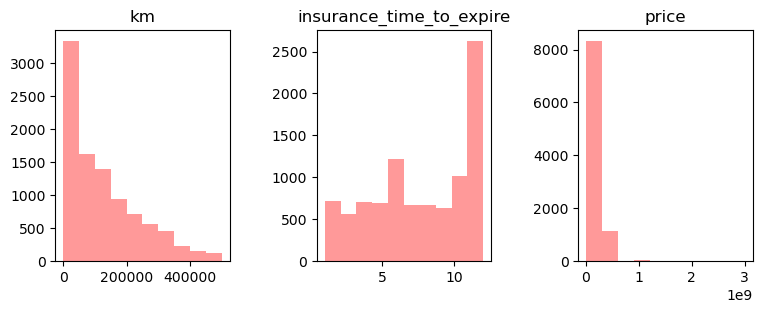

In [13]:
#Histogram of numeric variables
var_ind = [6, 10, 13]
plt.figure(figsize = (9, 3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 4):
    plt.subplot(1, 3, i)
    plt.hist(x = data.iloc[: , var_ind[i - 1]], alpha = 0.4, color = 'red')
    plt.title(data.columns[var_ind[i - 1]])

In [14]:
#Summary statistics of numeric variables
data[['km', 'insurance_time_to_expire', 'price']].describe()

,km,insurance_time_to_expire,price
count,9512.000000,9512.000000,9.512000e+03
mean,120604.719407,7.656644,2.143317e+08
std,113361.709352,3.351309,1.149665e+08
min,0.000000,1.000000,1.000000e+07
25%,25000.000000,5.000000,1.450000e+08
50%,92000.000000,8.000000,2.150000e+08
75%,190000.000000,11.000000,2.670000e+08
max,500000.000000,12.000000,3.000000e+09


In [15]:
#Frequency table for city
data['city'].value_counts()

Tehran     5038
Mashhad    1654
Isfahan    1528
Shiraz     1292
Name: city, dtype: int64

In [16]:
#Frequency table for brnad
data['brand'].value_counts()

PEUGEOT 405 GLX GAS                1198
PEUGEOT 206 Type 2                 1171
PEUGEOT 405 GLX CNG                 898
PEUGEOT 206 Type 5                  857
PEUGEOT 206 SD V8                   687
PEUGEOT PARS SAL                    603
PEUGEOT 405 SLX GAS                 488
PEUGEOT PARS LX TU5                 428
PEUGEOT PARS HYBRID                 350
PEUGEOT 207i AUTOMATIC              312
PEUGEOT 207i MANUAL                 308
PEUGEOT PARS SADE                   266
PEUGEOT 207i PANAROMA MANUAL        192
PEUGEOT ROA HYBRID                  182
PEUGEOT RD GAS                      143
PEUGEOT RD CNG                      132
PEUGEOT 405 GL CNG                   93
PEUGEOT 405 GL GAS                   85
PEUGEOT PARS AUTOMATIC TU5           85
PEUGEOT 405 GLX LPG                  77
PEUGEOT RD LPG                       75
PEUGEOT PARS ELX                     70
PEUGEOT 405 GLX TU5 GAS              68
PEUGEOT 206 Type 3                   58
PEUGEOT ROA GAS                      54


In [17]:
data['brand'].nunique()
#Note: too many levels

57

In [18]:
#Frequency table for production_year
data['production_year'].value_counts()
#Note: Shamsy year vs. Christian year

1400    1033
1398     946
1399     934
1396     897
1397     815
1395     647
1394     556
1393     427
1390     384
1389     364
1388     271
1383     260
1385     253
1392     244
1387     243
1391     233
1384     222
1386     203
1382     162
1381     120
1380     109
1379      57
1378      38
2009      19
1377      18
1376      15
1372      12
1375       5
1374       4
2017       3
1373       3
2016       3
2008       2
2019       1
2002       1
1997       1
2005       1
1370       1
2018       1
1998       1
2000       1
2004       1
2003       1
Name: production_year, dtype: int64

In [19]:
#Frequency table for color
data['color'].value_counts()

سفید          4334
نقره ای       1309
خاکستری       1136
مشکی           565
نوک مدادی      493
یشمی           328
سفید صدفی      256
دلفینی         246
زرد            181
بژ             101
سبز             97
نقرآبی          68
آبی             63
عنابی           44
طوسی            38
عدسی            36
قرمز            34
بادمجانی        32
آلبالویی        30
سرمه ای         27
گیلاسی          20
ذغالی           15
اطلسی           10
بنفش             8
زیتونی           8
تیتانیوم         6
قهوه ای          5
سربی             5
زرشکی            4
نارنجی           3
مسی              2
طلایی            2
کربن بلک         2
برنز             2
پوست پیازی       1
خاکی             1
Name: color, dtype: int64

In [20]:
data['color'].nunique()
#Note: too many levels

36

In [21]:
#Frequency table for body_condition
data['body_condition'].value_counts()
#Note: too many levels

سالم و بی خط و خش              5220
خط و خش جزیی                   2005
رنگ شدگی در ۱ ناحیه             630
دوررنگ                          604
رنگ شدگی در ۲ ناحیه             493
تمام رنگ                        198
رنگ شدگی در ۳ ناحیه             138
صافکاری بی رنگ، در ۱ ناحیه      118
رنگ شدگی در ۴ ناحیه              41
صافکاری بی رنگ، در ۲ ناحیه       28
رنگ شدگی در ۵ ناحیه              13
صافکاری بی رنگ، در ۳ ناحیه        7
صافکاری بی رنگ، در ۴ ناحیه        6
صافکاری بی رنگ، در ۱۰ ناحیه       3
رنگ شدگی در ۶ ناحیه               3
اوراقی                            2
رنگ شدگی در ۸ ناحیه               1
صافکاری بی رنگ، در ۵ ناحیه        1
رنگ شدگی در ۷ ناحیه               1
Name: body_condition, dtype: int64

In [22]:
#Frequency table for engine_condition
data['engine_condition'].value_counts()

سالم             9405
نیاز به تعمیر      65
تعویض شده          42
Name: engine_condition, dtype: int64

In [23]:
#Frequency table for chassis_condition
data['chassis_condition'].value_counts()

سالم و پلمپ    9381
ضربه خورده      116
رنگ شده          15
Name: chassis_condition, dtype: int64

In [24]:
#Frequency table for gearbox
data['gearbox'].value_counts()

دنده ای     8897
اتوماتیک     615
Name: gearbox, dtype: int64

In [25]:
#Frequency table for fuel_type
data['fuel_type'].value_counts()

gasoline    7541
CNG         1171
hybrid       633
LPG          167
Name: fuel_type, dtype: int64

## Data Preparation

In [26]:
#Extract the model from brand name
data['model'] = data['brand'].apply(lambda s: s.split()[1])
data['model'].value_counts()

405     3093
206     2944
PARS    1821
207i     888
RD       350
ROA      289
RDI       48
2008      43
407       20
404        4
508        4
504        3
301        2
205        2
406        1
Name: model, dtype: int64

In [27]:
#Reduce the number of levels in brand
data.loc[data['model'].isin(['404', '508', '504', '301', '205', '406']), 'model'] = 'other'
data['model'].value_counts()

405      3093
206      2944
PARS     1821
207i      888
RD        350
ROA       289
RDI        48
2008       43
407        20
other      16
Name: model, dtype: int64

In [28]:
data.loc[data['model'] == 'other', :]
#Note: PEUGEOT 404 production years are suspecious!

,no,time,city,brand,production_year,color,km,body_condition,engine_condition,chassis_condition,insurance_time_to_expire,gearbox,fuel_type,price,model
936,937,2022-03-29,Tehran,PEUGEOT 404,2005,بژ,111111,خط و خش جزیی,سالم,سالم و پلمپ,3,دنده ای,gasoline,90000000,other
1422,1423,2022-03-12,Tehran,PEUGEOT 301,2016,سفید,45000,سالم و بی خط و خش,سالم,سالم و پلمپ,11,اتوماتیک,gasoline,690000000,other
1775,1776,2022-03-05,Tehran,PEUGEOT 406,2019,سفید,32000,سالم و بی خط و خش,سالم,سالم و پلمپ,9,دنده ای,gasoline,280000000,other
2259,2260,2022-03-19,Tehran,PEUGEOT 404,2002,مشکی,400000,خط و خش جزیی,سالم,سالم و پلمپ,11,دنده ای,gasoline,90000000,other
2515,2516,2022-03-26,Tehran,PEUGEOT 301,2016,سفید,70000,سالم و بی خط و خش,سالم,سالم و پلمپ,10,اتوماتیک,gasoline,650000000,other
2905,2906,2022-04-02,Tehran,PEUGEOT 205,1997,طوسی,250,دوررنگ,سالم,سالم و پلمپ,6,دنده ای,gasoline,45000000,other
2993,2994,2022-03-05,Tehran,PEUGEOT 508 GT,2017,سفید صدفی,4000,سالم و بی خط و خش,سالم,سالم و پلمپ,11,اتوماتیک,gasoline,1520000000,other
3817,3818,2022-03-05,Tehran,PEUGEOT 404,2018,نوک مدادی,89000,رنگ شدگی در ۲ ناحیه,سالم,سالم و پلمپ,5,دنده ای,gasoline,180000000,other
4800,4801,2022-03-26,Tehran,PEUGEOT 508 GT,2017,سفید صدفی,4000,سالم و بی خط و خش,سالم,سالم و پلمپ,11,اتوماتیک,gasoline,1605000000,other
5913,5914,2022-03-27,Mashhad,PEUGEOT 508 GT,2016,سفید صدفی,89000,سالم و بی خط و خش,سالم,سالم و پلمپ,10,اتوماتیک,gasoline,1480000000,other


In [29]:
#Convert Christian year to Shamsy year
data['shamsy_year'] = data['production_year']
data.loc[data['shamsy_year'] > 1900, 'shamsy_year'] = data.loc[data['shamsy_year'] > 1900, 'shamsy_year'] - 621
print(data['shamsy_year'].min())
print(data['shamsy_year'].max())

1370
1400


In [30]:
#Create new feature based on production year
data['age'] = 1401 - data['shamsy_year']
#Check the results
print(np.sum(data['age'].isnull()))
data.head()

0


,no,time,city,brand,production_year,color,km,body_condition,engine_condition,chassis_condition,insurance_time_to_expire,gearbox,fuel_type,price,model,shamsy_year,age
0,1,2022-03-26,Tehran,PEUGEOT 405 GLX GAS,1393,نقره ای,80000,سالم و بی خط و خش,سالم,سالم و پلمپ,9,دنده ای,gasoline,187000000,405,1393,8
1,2,2022-03-05,Tehran,PEUGEOT 206 SD V8,1393,سفید,85000,خط و خش جزیی,سالم,سالم و پلمپ,4,دنده ای,gasoline,215000000,206,1393,8
2,3,2022-03-26,Tehran,PEUGEOT 206 Type 2,1397,سفید,46000,خط و خش جزیی,سالم,سالم و پلمپ,12,دنده ای,gasoline,220000000,206,1397,4
3,4,2022-03-19,Tehran,PEUGEOT 207i AUTOMATIC,1390,سفید,165000,سالم و بی خط و خش,سالم,سالم و پلمپ,5,اتوماتیک,gasoline,275000000,207i,1390,11
4,5,2022-03-19,Tehran,PEUGEOT 207i MANUAL,1396,سفید,50000,سالم و بی خط و خش,سالم,سالم و پلمپ,7,دنده ای,gasoline,310000000,207i,1396,5


In [31]:
#Reduce the number of levels in color
round(data['color'].value_counts() / data.shape[0] * 100, 2)

سفید          45.56
نقره ای       13.76
خاکستری       11.94
مشکی           5.94
نوک مدادی      5.18
یشمی           3.45
سفید صدفی      2.69
دلفینی         2.59
زرد            1.90
بژ             1.06
سبز            1.02
نقرآبی         0.71
آبی            0.66
عنابی          0.46
طوسی           0.40
عدسی           0.38
قرمز           0.36
بادمجانی       0.34
آلبالویی       0.32
سرمه ای        0.28
گیلاسی         0.21
ذغالی          0.16
اطلسی          0.11
بنفش           0.08
زیتونی         0.08
تیتانیوم       0.06
قهوه ای        0.05
سربی           0.05
زرشکی          0.04
نارنجی         0.03
مسی            0.02
طلایی          0.02
کربن بلک       0.02
برنز           0.02
پوست پیازی     0.01
خاکی           0.01
Name: color, dtype: float64

In [32]:
#Main colors
data['color_levels'] = data['color'].replace(['سفید',
                                              'نقره ای',
                                              'خاکستری',
                                              'مشکی',                                     
                                              'نوک مدادی'],
                                             ['white',
                                              'silver',
                                              'gray',
                                              'black',                                             
                                              'graphite gray'],
                                            inplace = False)

#Other colors
data.loc[~ data['color_levels'].isin(['white',
                                      'silver',
                                      'gray',
                                      'black',                                             
                                      'graphite gray']), 'color_levels'] = 'other'

#Check the results
print(np.sum(data['color_levels'].isnull()))
data['color_levels'].value_counts()

0


white            4334
other            1675
silver           1309
gray             1136
black             565
graphite gray     493
Name: color_levels, dtype: int64

In [33]:
#Convert body_condition into numeric variable
data['b_cond'] = data['body_condition'].replace(['سالم و بی خط و خش',
                                                 'خط و خش جزیی',
                                                 'صافکاری بی رنگ، در ۱ ناحیه',
                                                 'صافکاری بی رنگ، در ۲ ناحیه',
                                                 'صافکاری بی رنگ، در ۳ ناحیه',
                                                 'صافکاری بی رنگ، در ۴ ناحیه',
                                                 'صافکاری بی رنگ، در ۵ ناحیه',
                                                 'صافکاری بی رنگ، در ۶ ناحیه',
                                                 'صافکاری بی رنگ، در ۹ ناحیه',
                                                 'صافکاری بی رنگ، در ۱۰ ناحیه',
                                                 'رنگ شدگی در ۱ ناحیه',
                                                 'رنگ شدگی در ۲ ناحیه',
                                                 'رنگ شدگی در ۳ ناحیه',
                                                 'رنگ شدگی در ۴ ناحیه',
                                                 'رنگ شدگی در ۵ ناحیه',
                                                 'رنگ شدگی در ۶ ناحیه',       
                                                 'رنگ شدگی در ۷ ناحیه',  
                                                 'رنگ شدگی در ۸ ناحیه',    
                                                 'رنگ شدگی در ۹ ناحیه',
                                                 'رنگ شدگی در ۱۰ ناحیه',
                                                 'دوررنگ',
                                                 'تمام رنگ',
                                                 'اوراقی'],
                                                 list(range(1, 24)), inplace = False)

#Check the results
print(np.sum(data['b_cond'].isnull()))
data['b_cond'].describe()

0


count    9512.000000
mean        4.455635
std         6.260655
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        23.000000
Name: b_cond, dtype: float64

In [34]:

#Convert Persian language into English for engine_condition
data['e_cond'] = data['engine_condition'].replace(['سالم',
                                                   'تعویض شده',
                                                   'نیاز به تعمیر'], 
                                                  ['A', 'B', 'C'], inplace = False)

#Check the results
print(np.sum(data['e_cond'].isnull()))
data['e_cond'].value_counts()

0


A    9405
C      65
B      42
Name: e_cond, dtype: int64

In [35]:
#Convert Persian language into English for chassis_condition
data['c_cond'] = data['chassis_condition'].replace(['سالم و پلمپ',
                                                    'ضربه خورده',
                                                    'رنگ شده'], 
                                                   ['A', 'B', 'C'], inplace = False)

#Check the results
print(np.sum(data['c_cond'].isnull()))
data['c_cond'].value_counts()

0


A    9381
B     116
C      15
Name: c_cond, dtype: int64

In [36]:
#Convert Persian language into English for gearbox
data['if_automatic'] = data['gearbox'].replace(['دنده ای', 
                                                'اتوماتیک'], 
                                               ['no', 'yes'], inplace = False)

#Check the results
print(np.sum(data['if_automatic'].isnull()))
data['if_automatic'].value_counts()

0


no     8897
yes     615
Name: if_automatic, dtype: int64

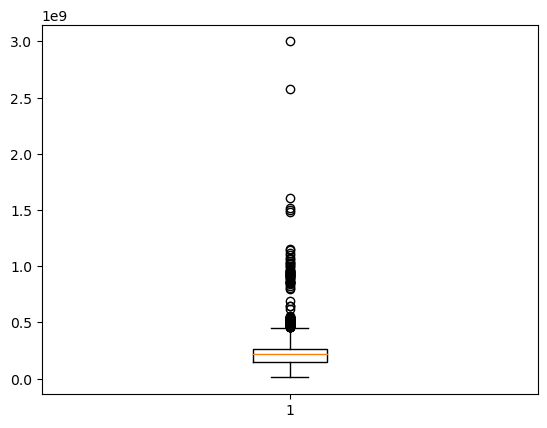

In [37]:
#Check for outliers
plt.boxplot(data['price'])
plt.show()

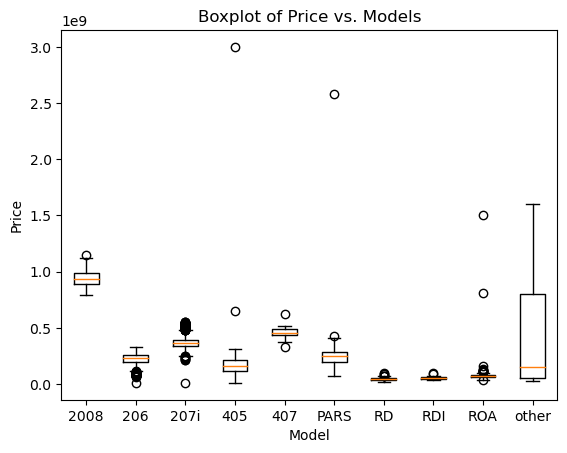

In [38]:
#Boxplot for multiple groups
plt.boxplot([data.loc[data['model'] == '2008', 'price'], 
             data.loc[data['model'] == '206', 'price'],
             data.loc[data['model'] == '207i', 'price'],
             data.loc[data['model'] == '405', 'price'],
             data.loc[data['model'] == '407', 'price'],
             data.loc[data['model'] == 'PARS', 'price'],
             data.loc[data['model'] == 'RD', 'price'],
             data.loc[data['model'] == 'RDI', 'price'],
             data.loc[data['model'] == 'ROA', 'price'],
             data.loc[data['model'] == 'other', 'price']])
plt.title('Boxplot of Price vs. Models')
plt.xticks(ticks = list(range(1, 11)), 
           labels = ['2008', '206', '207i', '405', '407', 'PARS', 'RD', 'RDI', 'ROA', 'other'])
plt.xlabel('Model')
plt.ylabel('Price')
plt.show()

In [39]:
data.groupby('model')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
2008,43.0,9.445581e+08,8.129233e+07,795000000.0,892500000.0,933000000.0,990000000.0,1.150000e+09
206,2944.0,2.230163e+08,5.189852e+07,11000000.0,200000000.0,230000000.0,258000000.0,3.300000e+08
207i,888.0,3.709107e+08,6.526604e+07,10000000.0,337000000.0,363500000.0,395000000.0,5.550000e+08
405,3093.0,1.651462e+08,8.075183e+07,11111111.0,116000000.0,163000000.0,210000000.0,3.000000e+09
407,20.0,4.593500e+08,6.203163e+07,330000000.0,433750000.0,452500000.0,488000000.0,6.200000e+08
PARS,1821.0,2.428981e+08,8.339237e+07,75000000.0,195000000.0,253000000.0,281500000.0,2.580000e+09
RD,350.0,4.627571e+07,1.065170e+07,20000000.0,39000000.0,45000000.0,52000000.0,1.000000e+08
RDI,48.0,5.612500e+07,1.175526e+07,39000000.0,47750000.0,55000000.0,61500000.0,1.000000e+08
ROA,289.0,7.931073e+07,9.571477e+07,38000000.0,63000000.0,70000000.0,79000000.0,1.500000e+09


In [40]:
#Outlier detection using Tukey's method
from scipy.stats import iqr
def outlier_detector(df, colname = 'price'):
    #Calculate lower band and upper bound for Tukey's method
    lb = np.quantile(df[colname], 0.25) - 1.5 * iqr(df[colname])
    ub = np.quantile(df[colname], 0.75) + 1.5 * iqr(df[colname])
    #Return rows w/ outliers in colname
    return df.loc[(df[colname] > ub) | (df[colname] < lb), :]

In [41]:
#Check outliers for 206
pd.set_option('display.max_rows', 200)
outlier_detector(df = data.loc[data['model'] == '206', :])
#Note: check index 1209

,no,time,city,brand,production_year,color,km,body_condition,engine_condition,chassis_condition,...,fuel_type,price,model,shamsy_year,age,color_levels,b_cond,e_cond,c_cond,if_automatic
57,58,2022-03-12,Tehran,PEUGEOT 206 Type 2,1387,نوک مدادی,293563,خط و خش جزیی,سالم,سالم و پلمپ,...,gasoline,112000000,206,1387,14,graphite gray,2,A,A,no
85,86,2022-03-19,Tehran,PEUGEOT 206 Type 2,1382,نقره ای,260000,خط و خش جزیی,سالم,سالم و پلمپ,...,gasoline,94000000,206,1382,19,silver,2,A,A,no
112,113,2022-03-12,Tehran,PEUGEOT 206 Type 2,1385,نقره ای,329000,خط و خش جزیی,سالم,سالم و پلمپ,...,gasoline,110000000,206,1385,16,silver,2,A,A,no
303,304,2022-03-19,Tehran,PEUGEOT 206 Type 2,1382,یشمی,450000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,85700000,206,1382,19,other,1,A,A,no
318,319,2022-03-05,Tehran,PEUGEOT 206 Type 2,1383,نقره ای,287700,دوررنگ,سالم,ضربه خورده,...,gasoline,83000000,206,1383,18,silver,21,A,B,no
381,382,2022-03-26,Tehran,PEUGEOT 206 Type 4,1381,مشکی,338228,خط و خش جزیی,سالم,سالم و پلمپ,...,gasoline,100000000,206,1381,20,black,2,A,A,yes
382,383,2022-04-02,Tehran,PEUGEOT 206 Type 2,1383,نقره ای,390000,خط و خش جزیی,سالم,سالم و پلمپ,...,gasoline,100000000,206,1383,18,silver,2,A,A,no
393,394,2022-03-05,Tehran,PEUGEOT 206 Type 2,1384,بژ,320000,خط و خش جزیی,سالم,سالم و پلمپ,...,gasoline,100000000,206,1384,17,other,2,A,A,no
466,467,2022-03-30,Tehran,PEUGEOT 206 Type 2,1383,نقره ای,400000,رنگ شدگی در ۱ ناحیه,نیاز به تعمیر,سالم و پلمپ,...,gasoline,95000000,206,1383,18,silver,11,C,A,no
487,488,2022-03-12,Tehran,PEUGEOT 206 Type 2,1384,مشکی,400000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,99000000,206,1384,17,black,1,A,A,no


In [42]:
#Check outliers for 207i
outlier_detector(df = data.loc[data['model'] == '207i', :])
#Note: check index 9196

,no,time,city,brand,production_year,color,km,body_condition,engine_condition,chassis_condition,...,fuel_type,price,model,shamsy_year,age,color_levels,b_cond,e_cond,c_cond,if_automatic
8,9,2022-03-26,Tehran,PEUGEOT 207i SD AUTOMATIC,1398,خاکستری,0,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,490000000,207i,1398,3,gray,1,A,A,yes
10,11,2022-03-19,Tehran,PEUGEOT 207i AUTOMATIC,1400,مشکی,8000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,500000000,207i,1400,1,black,1,A,A,yes
69,70,2022-03-27,Tehran,PEUGEOT 207i PANAROMA AUTOMATIC,1400,سفید,4000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,525000000,207i,1400,1,white,1,A,A,yes
89,90,2022-03-19,Tehran,PEUGEOT 207i PANAROMA AUTOMATIC,1400,مشکی,5277,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,535000000,207i,1400,1,black,1,A,A,yes
104,105,2022-03-12,Tehran,PEUGEOT 207i PANAROMA AUTOMATIC,1400,سفید,8000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,510000000,207i,1400,1,white,1,A,A,yes
284,285,2022-03-19,Tehran,PEUGEOT 207i AUTOMATIC,1400,سفید صدفی,0,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,490000000,207i,1400,1,other,1,A,A,yes
364,365,2022-03-05,Tehran,PEUGEOT 207i AUTOMATIC,1400,سفید,11000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,517000000,207i,1400,1,white,1,A,A,yes
366,367,2022-03-19,Tehran,PEUGEOT 207i AUTOMATIC,1400,مشکی,0,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,520000000,207i,1400,1,black,1,A,A,yes
373,374,2022-03-12,Tehran,PEUGEOT 207i AUTOMATIC,1399,سفید,0,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,500000000,207i,1399,2,white,1,A,A,no
453,454,2022-03-12,Tehran,PEUGEOT 207i AUTOMATIC,1389,نقره ای,180000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,248000000,207i,1389,12,silver,1,A,A,yes


In [43]:
#Check outliers for 405
outlier_detector(df = data.loc[data['model'] == '405', :])
#Note: check index 4550 and 5141

,no,time,city,brand,production_year,color,km,body_condition,engine_condition,chassis_condition,...,fuel_type,price,model,shamsy_year,age,color_levels,b_cond,e_cond,c_cond,if_automatic
4550,4551,2022-03-19,Tehran,PEUGEOT 405 GLi GAS,1400,نقره ای,0,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,3000000000,405,1400,1,silver,1,A,A,yes
5141,5142,2022-03-05,Mashhad,PEUGEOT 405 GL GAS,1380,زرشکی,300000,دوررنگ,سالم,سالم و پلمپ,...,gasoline,650000000,405,1380,21,other,21,A,A,no


In [44]:
#Check outliers for PARS
outlier_detector(df = data.loc[data['model'] == 'PARS', :])
#Note: check index 6147

,no,time,city,brand,production_year,color,km,body_condition,engine_condition,chassis_condition,...,fuel_type,price,model,shamsy_year,age,color_levels,b_cond,e_cond,c_cond,if_automatic
2353,2354,2022-03-19,Tehran,PEUGEOT PARS AUTOMATIC TU5,1399,سفید,9000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,425000000,PARS,1399,2,white,1,A,A,yes
6147,6148,2022-03-05,Mashhad,PEUGEOT PARS ELX,1398,سفید,57,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,2580000000,PARS,1398,3,white,1,A,A,no


In [45]:
#Check outliers for ROA
outlier_detector(df = data.loc[data['model'] == 'ROA', :])
#Note: check index 989 and 4996

,no,time,city,brand,production_year,color,km,body_condition,engine_condition,chassis_condition,...,fuel_type,price,model,shamsy_year,age,color_levels,b_cond,e_cond,c_cond,if_automatic
989,990,2022-03-26,Tehran,PEUGEOT ROA HYBRID,1387,زرد,500000,دوررنگ,نیاز به تعمیر,ضربه خورده,...,hybrid,1500000000,ROA,1387,14,other,21,C,B,no
1925,1926,2022-03-27,Tehran,PEUGEOT ROA HYBRID,1386,زرد,300000,خط و خش جزیی,سالم,سالم و پلمپ,...,hybrid,38000000,ROA,1386,15,other,2,A,A,no
2399,2400,2022-03-26,Tehran,PEUGEOT ROA SAL HYBRID,1390,زرد,500000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,hybrid,125000000,ROA,1390,11,other,1,A,A,no
2434,2435,2022-03-12,Tehran,PEUGEOT ROA SAL GAS,1389,نقره ای,34000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,121000000,ROA,1389,12,silver,1,A,A,no
2900,2901,2022-03-19,Tehran,PEUGEOT ROA SAL HYBRID,1389,نوک مدادی,280000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,hybrid,112500000,ROA,1389,12,graphite gray,1,A,A,no
3681,3682,2022-03-12,Tehran,PEUGEOT ROA SAL HYBRID,1390,زرد,0,صافکاری بی رنگ، در ۱۰ ناحیه,سالم,سالم و پلمپ,...,hybrid,165000000,ROA,1390,11,other,10,A,A,no
4160,4161,2022-04-02,Tehran,PEUGEOT ROA HYBRID,1387,زرد,350000,رنگ شدگی در ۱ ناحیه,سالم,سالم و پلمپ,...,hybrid,120000000,ROA,1387,14,other,11,A,A,no
4996,4997,2022-03-12,Tehran,PEUGEOT ROA HYBRID,1387,نوک مدادی,310002,سالم و بی خط و خش,سالم,سالم و پلمپ,...,hybrid,810000000,ROA,1387,14,graphite gray,1,A,A,no
5547,5548,2022-03-29,Mashhad,PEUGEOT ROA SAL HYBRID,1390,نقره ای,285000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,hybrid,109500000,ROA,1390,11,silver,1,A,A,no
6488,6489,2022-03-27,Mashhad,PEUGEOT ROA SAL HYBRID,1390,نقره ای,260000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,hybrid,110000000,ROA,1390,11,silver,1,A,A,no


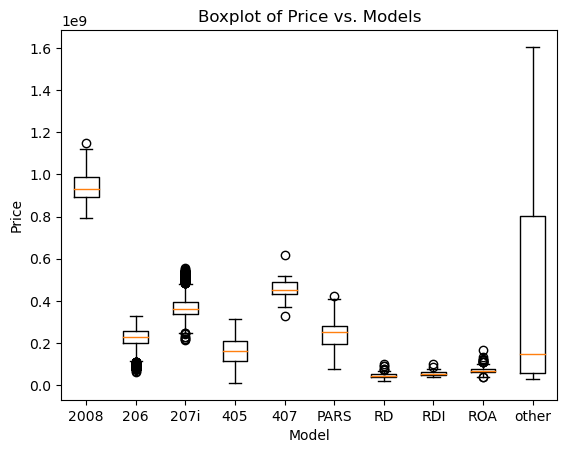

In [46]:
#Type of outliers: procedural error
data.drop(index = [989, 1209, 4550, 4996, 5141, 6147, 9196], inplace = True)

#Boxplot for multiple groups 
plt.boxplot([data.loc[data['model'] == '2008', 'price'], 
             data.loc[data['model'] == '206', 'price'],
             data.loc[data['model'] == '207i', 'price'],
             data.loc[data['model'] == '405', 'price'],
             data.loc[data['model'] == '407', 'price'],
             data.loc[data['model'] == 'PARS', 'price'],
             data.loc[data['model'] == 'RD', 'price'],
             data.loc[data['model'] == 'RDI', 'price'],
             data.loc[data['model'] == 'ROA', 'price'],
             data.loc[data['model'] == 'other', 'price']])
plt.title('Boxplot of Price vs. Models')
plt.xticks(ticks = list(range(1, 11)), 
           labels = ['2008', '206', '207i', '405', '407', 'PARS', 'RD', 'RDI', 'ROA', 'other'])
plt.xlabel('Model')
plt.ylabel('Price')
plt.show()

## Data Understanding - Phase 2

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9505 entries, 0 to 9511
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   no                        9505 non-null   int64         
 1   time                      9505 non-null   datetime64[ns]
 2   city                      9505 non-null   object        
 3   brand                     9505 non-null   object        
 4   production_year           9505 non-null   int64         
 5   color                     9505 non-null   object        
 6   km                        9505 non-null   int64         
 7   body_condition            9505 non-null   object        
 8   engine_condition          9505 non-null   object        
 9   chassis_condition         9505 non-null   object        
 10  insurance_time_to_expire  9505 non-null   int64         
 11  gearbox                   9505 non-null   object        
 12  fuel_type           

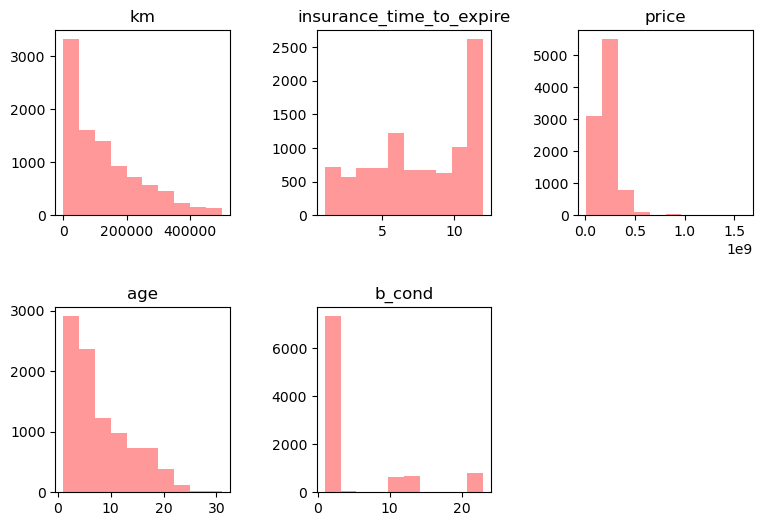

In [48]:
#Histogram of numeric variables
var_ind = [6, 10, 13, 16, 18]
plt.figure(figsize = (9, 6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 6):
    plt.subplot(2, 3, i)
    plt.hist(x = data.iloc[: , var_ind[i - 1]], alpha = 0.4, color = 'red')
    plt.title(data.columns[var_ind[i - 1]])

#### 5: Bivariate data analysis

In [49]:
#Correlation analysis
round(data.iloc[:, [13, 6, 10, 16, 18]].corr(method = 'pearson'), 2)

,price,km,insurance_time_to_expire,age,b_cond
price,1.00,-0.60,0.04,-0.74,-0.40
km,-0.60,1.00,-0.07,0.73,0.38
insurance_time_to_expire,0.04,-0.07,1.00,-0.05,-0.04
age,-0.74,0.73,-0.05,1.00,0.48
b_cond,-0.40,0.38,-0.04,0.48,1.00


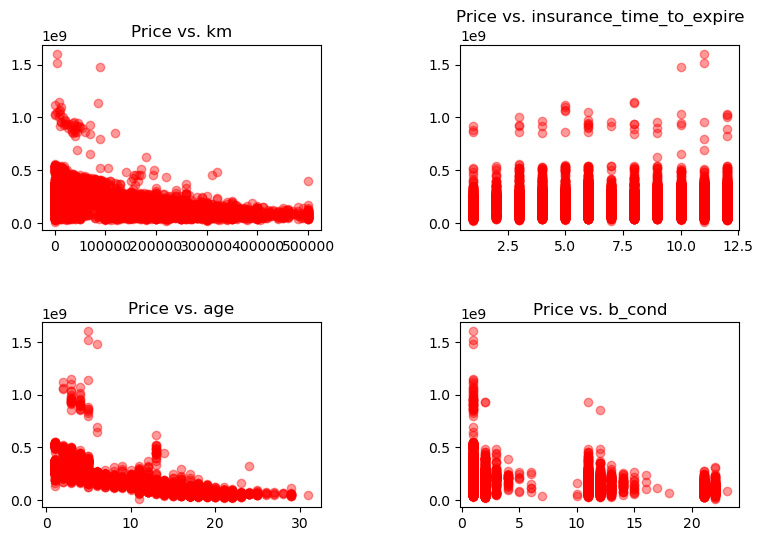

In [50]:
#Scatter plot
var_ind = [6, 10, 16, 18]
plt.figure(figsize = (9, 6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.scatter(x = data.iloc[: , var_ind[i - 1]], y = data['price'], alpha = 0.4, color = 'red')
    plt.title('Price vs. ' + data.columns[var_ind[i - 1]])

## Build Linear Regression Model

In [51]:
#Split data into test and train
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.3, random_state = 123)
print(train.shape)
print(test.shape)

(6653, 22)
(2852, 22)


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9505 entries, 0 to 9511
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   no                        9505 non-null   int64         
 1   time                      9505 non-null   datetime64[ns]
 2   city                      9505 non-null   object        
 3   brand                     9505 non-null   object        
 4   production_year           9505 non-null   int64         
 5   color                     9505 non-null   object        
 6   km                        9505 non-null   int64         
 7   body_condition            9505 non-null   object        
 8   engine_condition          9505 non-null   object        
 9   chassis_condition         9505 non-null   object        
 10  insurance_time_to_expire  9505 non-null   int64         
 11  gearbox                   9505 non-null   object        
 12  fuel_type           

In [53]:
#Create dummy variables for categorical variables
dummy_vars = pd.get_dummies(train[['city',
                                   'fuel_type',
                                   'model',
                                   'color_levels', 
                                   'e_cond', 
                                   'c_cond', 
                                   'if_automatic']])
dummy_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6653 entries, 9085 to 3584
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   city_Isfahan                6653 non-null   uint8
 1   city_Mashhad                6653 non-null   uint8
 2   city_Shiraz                 6653 non-null   uint8
 3   city_Tehran                 6653 non-null   uint8
 4   fuel_type_CNG               6653 non-null   uint8
 5   fuel_type_LPG               6653 non-null   uint8
 6   fuel_type_gasoline          6653 non-null   uint8
 7   fuel_type_hybrid            6653 non-null   uint8
 8   model_2008                  6653 non-null   uint8
 9   model_206                   6653 non-null   uint8
 10  model_207i                  6653 non-null   uint8
 11  model_405                   6653 non-null   uint8
 12  model_407                   6653 non-null   uint8
 13  model_PARS                  6653 non-null   uint8
 14  model

In [54]:
dummy_vars.head()

,city_Isfahan,city_Mashhad,city_Shiraz,city_Tehran,fuel_type_CNG,fuel_type_LPG,fuel_type_gasoline,fuel_type_hybrid,model_2008,model_206,...,color_levels_silver,color_levels_white,e_cond_A,e_cond_B,e_cond_C,c_cond_A,c_cond_B,c_cond_C,if_automatic_no,if_automatic_yes
9085,0,0,1,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
3491,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1091,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
701,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3733,0,0,0,1,0,0,1,0,0,0,...,0,1,1,0,0,1,0,0,1,0


In [55]:
#Define base level for each categorical variable
dummy_vars.drop(columns = ['city_Tehran',
                           'fuel_type_gasoline',
                           'model_405',
                           'color_levels_white', 
                           'e_cond_A', 
                           'c_cond_A', 
                           'if_automatic_no' 
                           ], inplace = True)
dummy_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6653 entries, 9085 to 3584
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   city_Isfahan                6653 non-null   uint8
 1   city_Mashhad                6653 non-null   uint8
 2   city_Shiraz                 6653 non-null   uint8
 3   fuel_type_CNG               6653 non-null   uint8
 4   fuel_type_LPG               6653 non-null   uint8
 5   fuel_type_hybrid            6653 non-null   uint8
 6   model_2008                  6653 non-null   uint8
 7   model_206                   6653 non-null   uint8
 8   model_207i                  6653 non-null   uint8
 9   model_407                   6653 non-null   uint8
 10  model_PARS                  6653 non-null   uint8
 11  model_RD                    6653 non-null   uint8
 12  model_RDI                   6653 non-null   uint8
 13  model_ROA                   6653 non-null   uint8
 14  model

In [56]:
#Define feature matrix 
X_ = train[['km', 'insurance_time_to_expire', 'age', 'b_cond']]
X_train = pd.concat([X_, dummy_vars], axis = 1)
X_train = sm.add_constant(X_train) #add constant
X_train.head()

,const,km,insurance_time_to_expire,age,b_cond,city_Isfahan,city_Mashhad,city_Shiraz,fuel_type_CNG,fuel_type_LPG,...,color_levels_black,color_levels_graphite gray,color_levels_gray,color_levels_other,color_levels_silver,e_cond_B,e_cond_C,c_cond_B,c_cond_C,if_automatic_yes
9085,1.0,0,11,15,22,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3491,1.0,0,9,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1091,1.0,33000,7,2,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
701,1.0,272002,7,19,21,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3733,1.0,0,8,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#Define response matrix
y_train = train['price']
y_train

9085    110000000
3491    541000000
1091    253000000
701      75000000
3733    278000000
          ...    
7388    240000000
7769     72000000
5223    212000000
1348     76000000
3584    235000000
Name: price, Length: 6653, dtype: int64

In [58]:
#Linear regression - model 1
model_1 = sm.OLS(y_train, X_train).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     2144.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:49:56   Log-Likelihood:            -1.2446e+05
No. Observations:                6653   AIC:                         2.490e+05
Df Residuals:                    6623   BIC:                         2.492e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2.696e+08   1.66e+06    162.063      0.000    2.66e+08    2.73e+08
km                           -77.6479      5.330    -14.569      0.000     -88.095     -67.200
insurance_time_to_expire    4.935e+05   1.19e+05      4.143      0.000     2.6e+05    7.27e+05
age                         -8.75e+06   1.25e+05    -70.159      0.000   -8.99e+06   -8.51e+06
b_cond                     -8.782e+05   7.46e+04    -11.767      0.000   -1.02e+06   -7.32e+05
city_Isfahan                4.199e+06   1.16e+06      3.623      0.000    1.93e+06    6.47e+06
city_Mashhad                1.369e+06   1.12e+06      1.224      0.221   -8.24e+05    3.56e+06
city_Shiraz                 2.259e+06    1.2e+06      1.879      0.060   -9.72e+04    4.61e+06
fuel_type_CNG              -5.214e+06   1.46e+06     -3.571      0.000   -8.08e+06   -2.35e+06
fuel_type_LPG               6.455e+06   3.42e+06      1.890      0.059   -2.41e+05    1.32e+07
fuel_type_hybrid            8.778e+05      2e+06      0.440      0.660   -3.04e+06    4.79e+06
model_2008                  6.324e+08   7.13e+06     88.673      0.000    6.18e+08    6.46e+08
model_206                   1.375e+07   1.26e+06     10.903      0.000    1.13e+07    1.62e+07
model_207i                  9.371e+07   1.97e+06     47.469      0.000    8.98e+07    9.76e+07
model_407                   2.447e+08   9.56e+06     25.608      0.000    2.26e+08    2.63e+08
model_PARS                  2.858e+07    1.4e+06     20.356      0.000    2.58e+07    3.13e+07
model_RD                   -3.524e+07   2.58e+06    -13.648      0.000   -4.03e+07   -3.02e+07
model_RDI                  -3.663e+07    5.3e+06     -6.916      0.000    -4.7e+07   -2.62e+07
model_ROA                  -4.431e+07   2.99e+06    -14.799      0.000   -5.02e+07   -3.84e+07
model_other                 2.715e+08   9.43e+06     28.789      0.000    2.53e+08     2.9e+08
color_levels_black          -5.09e+06   1.84e+06     -2.767      0.006    -8.7e+06   -1.48e+06
color_levels_graphite gray -1.184e+07   2.02e+06     -5.872      0.000   -1.58e+07   -7.89e+06
color_levels_gray          -1.188e+07   1.43e+06     -8.313      0.000   -1.47e+07   -9.08e+06
color_levels_other         -6.922e+06   1.38e+06     -5.007      0.000   -9.63e+06   -4.21e+06
color_levels_silver         -1.32e+07   1.53e+06     -8.646      0.000   -1.62e+07   -1.02e+07
e_cond_B                     3.37e+06    5.7e+06      0.591      0.554   -7.81e+06    1.45e+07
e_cond_C                   -1.837e+07   4.97e+06     -3.697      0.000   -2.81e+07   -8.63e+06
c_cond_B                   -6.947e+06   3.71e+06     -1.871      0.061   -1.42e+07    3.32e+05
c_cond_C                   -2.776e+07   1.08e+07     -2.563      0.010    -4.9e+07   -6.53e+06
if_automatic_yes            7.948e+07   2.0

In [59]:
#Function to plot histogram of residuals
def hist_residuals(model, bins = 50):
    #Calculate density
    from scipy import stats
    density = stats.gaussian_kde(model.resid)
    xp = np.linspace(model.resid.min(), model.resid.max(), 100)
    yp = density.pdf(xp)

    #Histogram
    plt.hist(model.resid, bins = bins, 
             color = 'red', alpha = 0.7, density = True)
    plt.axvline(model.resid.mean(), color = 'black', 
                linewidth = 2, linestyle = '--', label = "Average")
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.plot(xp, yp, color = 'black', linewidth = 2)
    plt.legend()
    
    return plt.show()    

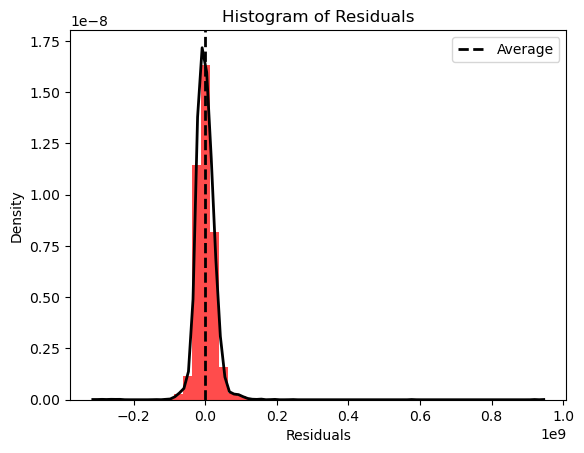

In [60]:
#Histogram of residuals - model 1
hist_residuals(model_1)

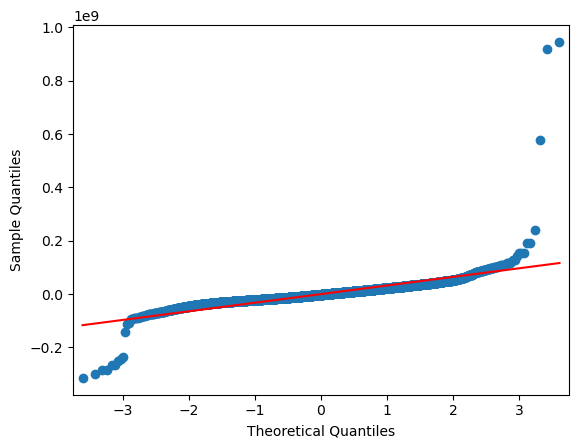

In [61]:
#QQ-plot - model 1
sm.qqplot(model_1.resid, line = 's')
plt.show()

In [62]:
#Function to plot residuals vs. fitted values
def residuals_fittedvalues_plot(model):
    #Implement Lowess algorithm
    lowess_res = sm.nonparametric.lowess(model.resid, model.fittedvalues)

    #Scatter plot: residuals vs. fitted values
    plt.scatter(x = model.fittedvalues, y = model.resid, 
                color = 'red', alpha = 0.7, label = 'data')
    plt.title('Residuals vs. Fitted values')
    plt.xlabel('Fitted Values', fontsize = 12)
    plt.ylabel('Residuals', fontsize = 12)
    plt.grid()

    #Add LOWESS line
    plt.plot(lowess_res[:, 0], lowess_res[:, 1], 'black', 
             alpha = 0.8, linewidth = 2, label = 'LOWESS')
    plt.legend()

    #Top three observations with greates absolute value of the residual
    top3 = abs(model.resid).sort_values(ascending = False)[:3]
    for i in top3.index:
        plt.annotate(i, xy = (model.fittedvalues[i], model.resid[i]), color = 'blue')
    
    return plt.show()

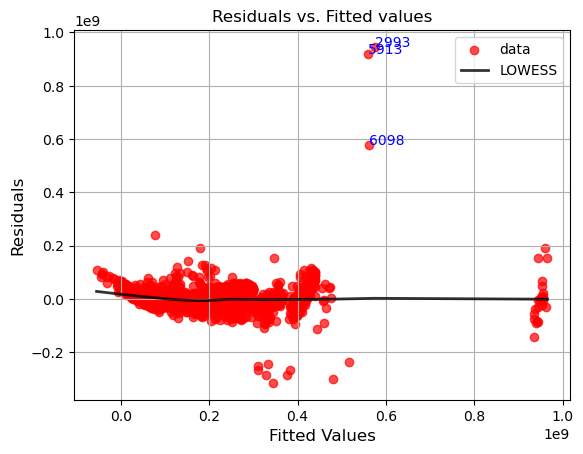

In [63]:
#Scatter plot of residuals vs. fitted values - model 1
residuals_fittedvalues_plot(model_1)

In [64]:
train.iloc[[2993, 5913, 6098], :]

,no,time,city,brand,production_year,color,km,body_condition,engine_condition,chassis_condition,...,fuel_type,price,model,shamsy_year,age,color_levels,b_cond,e_cond,c_cond,if_automatic
7012,7013,2022-03-19,Isfahan,PEUGEOT 405 GLX GAS,1393,دلفینی,150000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,173500000,405,1393,8,other,1,A,A,no
1864,1865,2022-03-05,Tehran,PEUGEOT 207i AUTOMATIC,1398,سفید,25000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,450000000,207i,1398,3,white,1,A,A,yes
6392,6393,2022-03-29,Mashhad,PEUGEOT 207i MANUAL,1397,مشکی,85000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,290000000,207i,1397,4,black,1,A,A,no


In [65]:
#Function to check Cook's distance
def influencer_detector(model, thershold = 1):
    
    #create instance of influence
    influence = model.get_influence()

    #Obtain Cook's distance for each observation
    cooks = influence.cooks_distance

    #Check observations w/ Cook's distance greater than thershold
    return np.where(cooks[0] > 1)

In [66]:
#Check Cook's ditance - model 1
influencer_detector(model_1)

(array([5310, 5392, 5776], dtype=int64),)

In [67]:
train.iloc[[5310, 5392, 5776], :]

,no,time,city,brand,production_year,color,km,body_condition,engine_condition,chassis_condition,...,fuel_type,price,model,shamsy_year,age,color_levels,b_cond,e_cond,c_cond,if_automatic
6098,6099,2022-03-19,Mashhad,PEUGEOT 508 GT,2017,نقره ای,86000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,1140000000,other,1396,5,silver,1,A,A,yes
5913,5914,2022-03-27,Mashhad,PEUGEOT 508 GT,2016,سفید صدفی,89000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,1480000000,other,1395,6,other,1,A,A,yes
2993,2994,2022-03-05,Tehran,PEUGEOT 508 GT,2017,سفید صدفی,4000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,1520000000,other,1396,5,other,1,A,A,yes


In [68]:
#Function to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    #Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return(vif)

In [69]:
#Check multicollinearity for numeric variables
calc_vif(X_train[['km', 'insurance_time_to_expire', 'age', 'b_cond']])
#Note: If VIF > 10 then multicollinearity is high

,variables,VIF
0,km,4.525167
1,insurance_time_to_expire,2.048922
2,age,6.080495
3,b_cond,1.976046


In [70]:
#Box-Cox transformation
from sklearn.preprocessing import PowerTransformer
boxcox = PowerTransformer(method = 'box-cox')
boxcox.fit(y_train.values.reshape(-1, 1))
boxcox.lambdas_

array([0.492546])

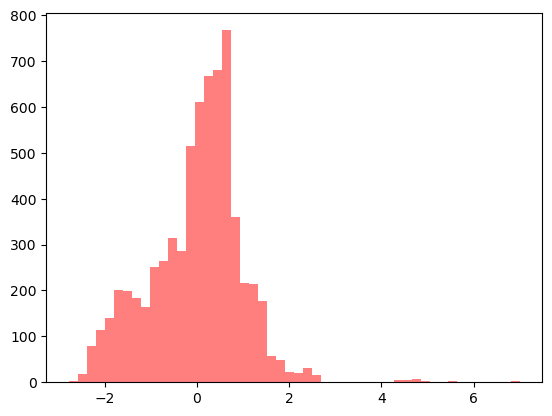

In [71]:
trans_y_train = boxcox.fit_transform(y_train.values.reshape(-1, 1))
plt.hist(trans_y_train, color = 'red', alpha = 0.5, bins = 50)
plt.show()

In [72]:
#Linear regression - model 2
model_2 = sm.OLS(trans_y_train, X_train).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     3714.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:50:50   Log-Likelihood:                 35.859
No. Observations:                6653   AIC:                            -11.72
Df Residuals:                    6623   BIC:                             192.4
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.6697      0.012     53.914      0.000       0.645       0.694
km                         -6.494e-07   3.98e-08    -16.320      0.000   -7.27e-07   -5.71e-07
insurance_time_to_expire       0.0032      0.001      3.564      0.000       0.001       0.005
age                           -0.0961      0.001   -103.164      0.000      -0.098      -0.094
b_cond                        -0.0101      0.001    -18.122      0.000      -0.011      -0.009
city_Isfahan                   0.0430      0.009      4.974      0.000       0.026       0.060
city_Mashhad                  -0.0013      0.008     -0.155      0.876      -0.018       0.015
city_Shiraz                    0.0209      0.009      2.327      0.020       0.003       0.038
fuel_type_CNG                 -0.0411      0.011     -3.772      0.000      -0.062      -0.020
fuel_type_LPG                 -0.0071      0.026     -0.278      0.781      -0.057       0.043
fuel_type_hybrid               0.0318      0.015      2.134      0.033       0.003       0.061
model_2008                     3.7437      0.053     70.301      0.000       3.639       3.848
model_206                      0.1808      0.009     19.198      0.000       0.162       0.199
model_207i                     0.7851      0.015     53.261      0.000       0.756       0.814
model_407                      2.1875      0.071     30.660      0.000       2.048       2.327
model_PARS                     0.3049      0.010     29.079      0.000       0.284       0.325
model_RD                      -0.7178      0.019    -37.229      0.000      -0.756      -0.680
model_RDI                     -0.6594      0.040    -16.671      0.000      -0.737      -0.582
model_ROA                     -0.6818      0.022    -30.495      0.000      -0.726      -0.638
model_other                    1.3107      0.070     18.615      0.000       1.173       1.449
color_levels_black            -0.0591      0.014     -4.306      0.000      -0.086      -0.032
color_levels_graphite gray    -0.0983      0.015     -6.527      0.000      -0.128      -0.069
color_levels_gray             -0.0851      0.011     -7.970      0.000      -0.106      -0.064
color_levels_other            -0.0881      0.010     -8.539      0.000      -0.108      -0.068
color_levels_silver           -0.1076      0.011     -9.436      0.000      -0.130      -0.085
e_cond_B                      -0.0137      0.043     -0.322      0.747      -0.097       0.070
e_cond_C                      -0.2167      0.037     -5.842      0.000      -0.289      -0.144
c_cond_B                      -0.1175      0.028     -4.238      0.000      -0.172      -0.063
c_cond_C                      -0.3221      0.081     -3.984      0.000      -0.481      -0.164
if_automatic_yes               0.6479      

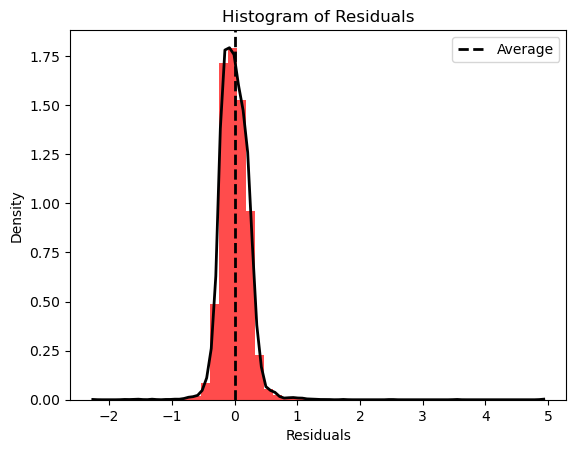

In [73]:
#Histogram of residuals - model 2
hist_residuals(model_2)

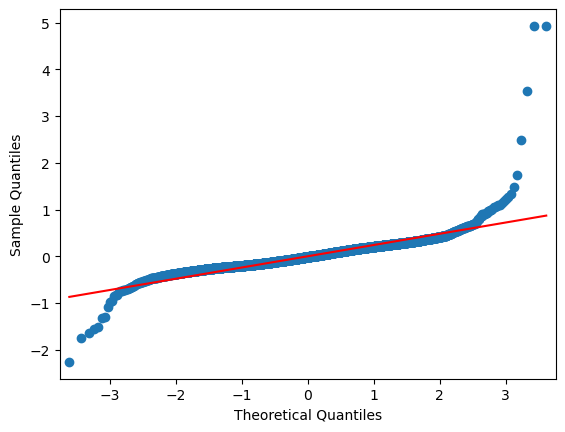

In [74]:
#QQ-plot - model 2
sm.qqplot(model_2.resid, line = 's')
plt.show()

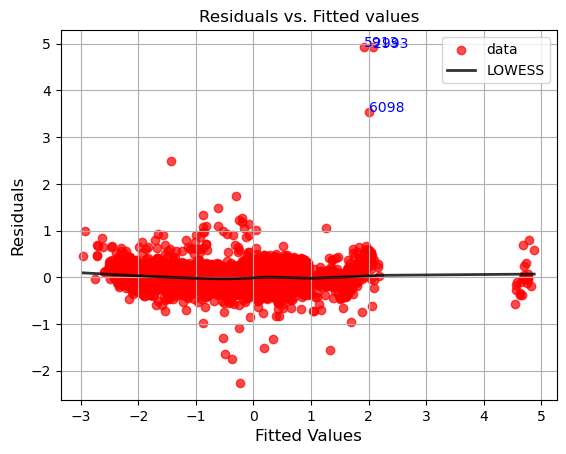

In [75]:
#Scatter plot of residuals vs. fitted values - model 2
residuals_fittedvalues_plot(model_2)

In [76]:
#Check Cook's ditance - model 2
influencer_detector(model_2)

(array([5392, 5776], dtype=int64),)

In [77]:
train.iloc[[5392, 5776], :]

,no,time,city,brand,production_year,color,km,body_condition,engine_condition,chassis_condition,...,fuel_type,price,model,shamsy_year,age,color_levels,b_cond,e_cond,c_cond,if_automatic
5913,5914,2022-03-27,Mashhad,PEUGEOT 508 GT,2016,سفید صدفی,89000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,1480000000,other,1395,6,other,1,A,A,yes
2993,2994,2022-03-05,Tehran,PEUGEOT 508 GT,2017,سفید صدفی,4000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,gasoline,1520000000,other,1396,5,other,1,A,A,yes


In [78]:
#Note: Remove observations (be cautious!)
X_train.drop(index = [2993, 5913, 5392, 6098, 5776], inplace = True)
y_train.drop(index = [2993, 5913, 5392, 6098, 5776], inplace = True)
trans_y_train = PowerTransformer(method = 'box-cox').fit_transform(y_train.values.reshape(-1, 1))

In [79]:
#Linear regression - model 3
model_3 = sm.OLS(trans_y_train, X_train).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     4590.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:51:17   Log-Likelihood:                 704.64
No. Observations:                6648   AIC:                            -1349.
Df Residuals:                    6618   BIC:                            -1145.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.6703      0.011     59.675      0.000       0.648       0.692
km                         -6.654e-07    3.6e-08    -18.490      0.000   -7.36e-07   -5.95e-07
insurance_time_to_expire       0.0026      0.001      3.214      0.001       0.001       0.004
age                           -0.0949      0.001   -112.666      0.000      -0.097      -0.093
b_cond                        -0.0101      0.001    -20.062      0.000      -0.011      -0.009
city_Isfahan                   0.0480      0.008      6.131      0.000       0.033       0.063
city_Mashhad                  -0.0116      0.008     -1.530      0.126      -0.026       0.003
city_Shiraz                    0.0217      0.008      2.677      0.007       0.006       0.038
fuel_type_CNG                 -0.0401      0.010     -4.067      0.000      -0.059      -0.021
fuel_type_LPG                 -0.0090      0.023     -0.392      0.695      -0.054       0.036
fuel_type_hybrid               0.0249      0.013      1.848      0.065      -0.002       0.051
model_2008                     4.0214      0.048     83.469      0.000       3.927       4.116
model_206                      0.1816      0.009     21.323      0.000       0.165       0.198
model_207i                     0.8378      0.013     62.767      0.000       0.812       0.864
model_407                      2.2817      0.065     35.360      0.000       2.155       2.408
model_PARS                     0.3125      0.009     32.956      0.000       0.294       0.331
model_RD                      -0.6976      0.017    -40.002      0.000      -0.732      -0.663
model_RDI                     -0.6491      0.036    -18.147      0.000      -0.719      -0.579
model_ROA                     -0.6678      0.020    -33.031      0.000      -0.707      -0.628
model_other                   -0.1906      0.073     -2.593      0.010      -0.335      -0.047
color_levels_black            -0.0547      0.012     -4.403      0.000      -0.079      -0.030
color_levels_graphite gray    -0.1041      0.014     -7.643      0.000      -0.131      -0.077
color_levels_gray             -0.0923      0.010     -9.560      0.000      -0.111      -0.073
color_levels_other            -0.1004      0.009    -10.752      0.000      -0.119      -0.082
color_levels_silver           -0.1214      0.010    -11.769      0.000      -0.142      -0.101
e_cond_B                      -0.0200      0.038     -0.520      0.603      -0.095       0.055
e_cond_C                      -0.1430      0.034     -4.257      0.000      -0.209      -0.077
c_cond_B                      -0.1222      0.025     -4.875      0.000      -0.171      -0.073
c_cond_C                      -0.3281      0.073     -4.487      0.000      -0.471      -0.185
if_automatic_yes               0.6050      

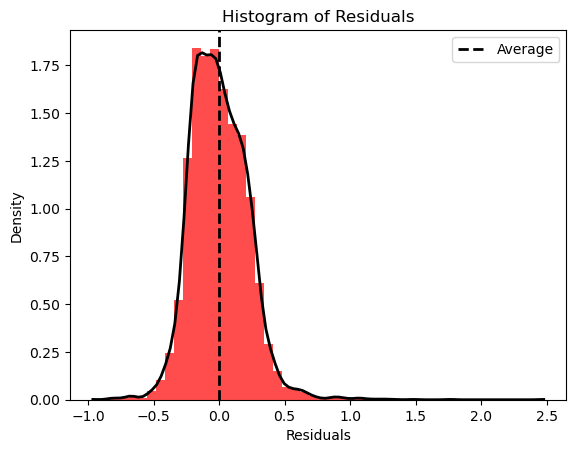

In [80]:
#Histogram of residuals - model 3
hist_residuals(model_3)

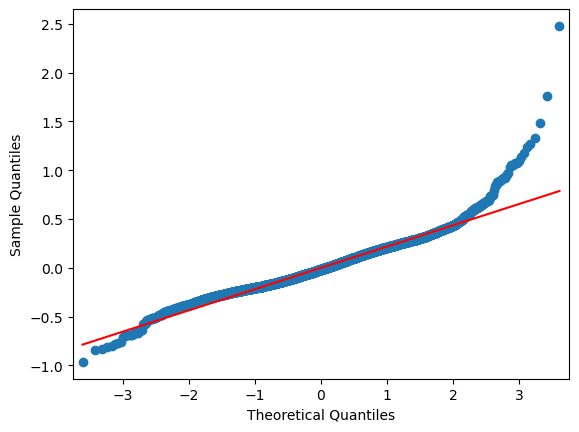

In [81]:
#QQ-plot - model 3
sm.qqplot(model_3.resid, line = 's')
plt.show()

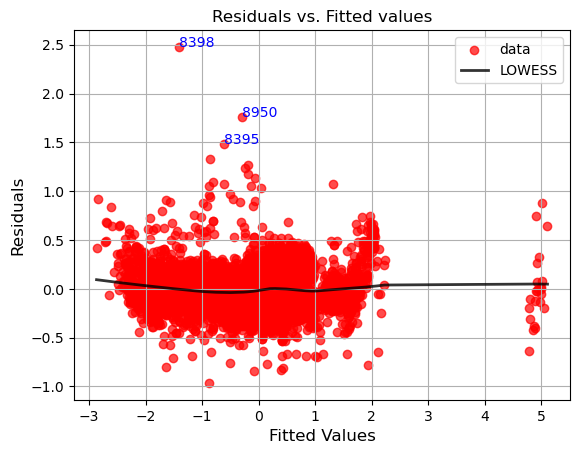

In [82]:
#Scatter plot of residuals vs. fitted values - model 3
residuals_fittedvalues_plot(model_3)

In [83]:
#Check Cook's ditance - model 3
influencer_detector(model_3)

(array([], dtype=int64),)

In [84]:
#Remove non-significant variables from regression model
X_train.drop(columns = ['city_Mashhad', 
                        'fuel_type_LPG', 
                        'fuel_type_hybrid', 
                        'e_cond_B'], inplace = True)

In [85]:
#Linear regression - model 4
model_4 = sm.OLS(trans_y_train, X_train).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     5322.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:51:48   Log-Likelihood:                 701.71
No. Observations:                6648   AIC:                            -1351.
Df Residuals:                    6622   BIC:                            -1175.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.6672      0.011     60.216      0.000       0.646       0.689
km                         -6.627e-07   3.59e-08    -18.481      0.000   -7.33e-07   -5.92e-07
insurance_time_to_expire       0.0026      0.001      3.189      0.001       0.001       0.004
age                           -0.0950      0.001   -113.203      0.000      -0.097      -0.093
b_cond                        -0.0101      0.001    -20.107      0.000      -0.011      -0.009
city_Isfahan                   0.0512      0.008      6.778      0.000       0.036       0.066
city_Shiraz                    0.0245      0.008      3.109      0.002       0.009       0.040
fuel_type_CNG                 -0.0411      0.010     -4.248      0.000      -0.060      -0.022
model_2008                     4.0226      0.048     83.496      0.000       3.928       4.117
model_206                      0.1820      0.008     21.515      0.000       0.165       0.199
model_207i                     0.8387      0.013     62.925      0.000       0.813       0.865
model_407                      2.2810      0.065     35.355      0.000       2.154       2.407
model_PARS                     0.3172      0.009     34.744      0.000       0.299       0.335
model_RD                      -0.7006      0.017    -41.033      0.000      -0.734      -0.667
model_RDI                     -0.6480      0.036    -18.158      0.000      -0.718      -0.578
model_ROA                     -0.6492      0.017    -37.519      0.000      -0.683      -0.615
model_other                   -0.1894      0.073     -2.578      0.010      -0.333      -0.045
color_levels_black            -0.0553      0.012     -4.457      0.000      -0.080      -0.031
color_levels_graphite gray    -0.1037      0.014     -7.617      0.000      -0.130      -0.077
color_levels_gray             -0.0912      0.010     -9.472      0.000      -0.110      -0.072
color_levels_other            -0.1002      0.009    -10.740      0.000      -0.118      -0.082
color_levels_silver           -0.1212      0.010    -11.753      0.000      -0.141      -0.101
e_cond_C                      -0.1426      0.034     -4.246      0.000      -0.208      -0.077
c_cond_B                      -0.1238      0.025     -4.944      0.000      -0.173      -0.075
c_cond_C                      -0.3251      0.073     -4.447      0.000      -0.468      -0.182
if_automatic_yes               0.6054      0.014     44.527      0.000       0.579       0.632
==============================================================================
Omnibus:                     1341.687   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7677.780
Skew:                           0.845   Prob(JB):                         0.00
Kurtosis:   

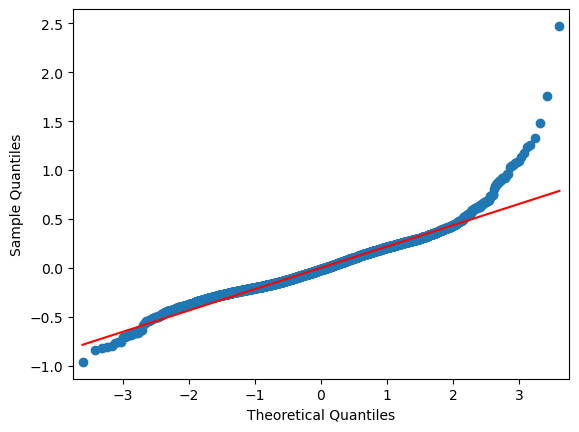

In [86]:
#QQ-plot - model 4
sm.qqplot(model_4.resid, line = 's')
plt.show()

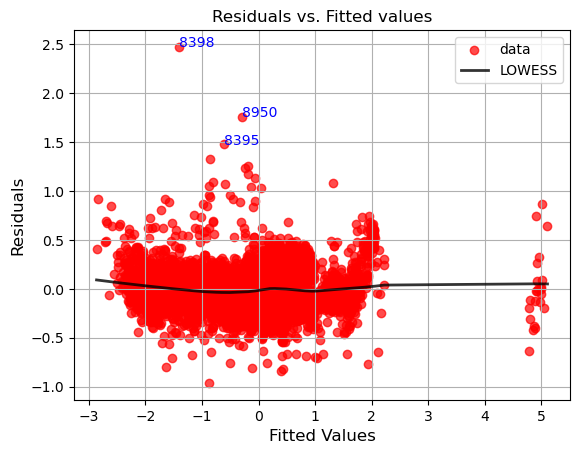

In [87]:
#Scatter plot of residuals vs. fitted values - model 4
residuals_fittedvalues_plot(model_4)

In [88]:
#Check Cook's ditance - model 4
influencer_detector(model_4)

(array([], dtype=int64),)

## Model Evaluation

In [89]:
#Create dummy variables for categorical variables in test
dummy_vars = pd.get_dummies(test[['city',
                                  'fuel_type',
                                  'model',
                                  'color_levels', 
                                  'e_cond', 
                                  'c_cond', 
                                  'if_automatic']])
dummy_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2852 entries, 2847 to 5572
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   city_Isfahan                2852 non-null   uint8
 1   city_Mashhad                2852 non-null   uint8
 2   city_Shiraz                 2852 non-null   uint8
 3   city_Tehran                 2852 non-null   uint8
 4   fuel_type_CNG               2852 non-null   uint8
 5   fuel_type_LPG               2852 non-null   uint8
 6   fuel_type_gasoline          2852 non-null   uint8
 7   fuel_type_hybrid            2852 non-null   uint8
 8   model_2008                  2852 non-null   uint8
 9   model_206                   2852 non-null   uint8
 10  model_207i                  2852 non-null   uint8
 11  model_405                   2852 non-null   uint8
 12  model_407                   2852 non-null   uint8
 13  model_PARS                  2852 non-null   uint8
 14  model

In [90]:
#Remove base level for each categorical variable + non-significant dummies
dummy_vars.drop(columns = ['city_Tehran',
                           'city_Mashhad',
                           'fuel_type_gasoline',
                           'fuel_type_hybrid', 
                           'fuel_type_LPG', 
                           'model_405',
                           'color_levels_white', 
                           'e_cond_A',
                           'e_cond_B',
                           'c_cond_A', 
                           'if_automatic_no' 
                           ], inplace = True)           

In [91]:
#Define the feature matrix 
X_ = test[['km', 'insurance_time_to_expire', 'age', 'b_cond']]
X_test = pd.concat([X_, dummy_vars], axis = 1)
X_test = sm.add_constant(X_test) #add constant
X_test.head()

,const,km,insurance_time_to_expire,age,b_cond,city_Isfahan,city_Shiraz,fuel_type_CNG,model_2008,model_206,...,model_other,color_levels_black,color_levels_graphite gray,color_levels_gray,color_levels_other,color_levels_silver,e_cond_C,c_cond_B,c_cond_C,if_automatic_yes
2847,1.0,27000,10,2,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8967,1.0,155000,1,5,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1623,1.0,280000,9,11,13,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2141,1.0,37000,1,3,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8504,1.0,32000,12,5,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [92]:
X_train.columns

Index(['const', 'km', 'insurance_time_to_expire', 'age', 'b_cond',
       'city_Isfahan', 'city_Shiraz', 'fuel_type_CNG', 'model_2008',
       'model_206', 'model_207i', 'model_407', 'model_PARS', 'model_RD',
       'model_RDI', 'model_ROA', 'model_other', 'color_levels_black',
       'color_levels_graphite gray', 'color_levels_gray', 'color_levels_other',
       'color_levels_silver', 'e_cond_C', 'c_cond_B', 'c_cond_C',
       'if_automatic_yes'],
      dtype='object')

In [93]:
X_test.columns

Index(['const', 'km', 'insurance_time_to_expire', 'age', 'b_cond',
       'city_Isfahan', 'city_Shiraz', 'fuel_type_CNG', 'model_2008',
       'model_206', 'model_207i', 'model_407', 'model_PARS', 'model_RD',
       'model_RDI', 'model_ROA', 'model_other', 'color_levels_black',
       'color_levels_graphite gray', 'color_levels_gray', 'color_levels_other',
       'color_levels_silver', 'e_cond_C', 'c_cond_B', 'c_cond_C',
       'if_automatic_yes'],
      dtype='object')

In [94]:
#Prediction using model 4
test_pred = model_4.predict(X_test)
test_pred

2847    0.726682
8967    1.029158
1623   -0.833611
2141    0.441063
8504    0.398347
          ...   
6617    0.816353
812     0.252565
2339    2.034410
9269    0.673814
5572   -1.529701
Length: 2852, dtype: float64

In [95]:
#Inverse transformation of predicted values
test['pred'] = pd.Series(boxcox.inverse_transform(test_pred.values.reshape(-1, 1)).reshape(-1), 
                         index = test_pred.index)
test.head()

,no,time,city,brand,production_year,color,km,body_condition,engine_condition,chassis_condition,...,price,model,shamsy_year,age,color_levels,b_cond,e_cond,c_cond,if_automatic,pred
2847,2848,2022-04-02,Tehran,PEUGEOT PARS SAL,1399,مشکی,27000,خط و خش جزیی,سالم,سالم و پلمپ,...,280000000,PARS,1399,2,black,2,A,A,no,2.796486e+08
8967,8968,2022-03-19,Shiraz,PEUGEOT PARS SAL,1396,سفید,155000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,225000000,PARS,1396,5,white,1,A,A,yes,3.164444e+08
1623,1624,2022-03-05,Tehran,PEUGEOT 405 GLX CNG,1390,نقره ای,280000,رنگ شدگی در ۳ ناحیه,سالم,سالم و پلمپ,...,130000000,405,1390,11,silver,13,A,A,no,1.263513e+08
2141,2142,2022-03-19,Tehran,PEUGEOT 206 Type 2,1398,خاکستری,37000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,238000000,206,1398,3,gray,1,A,A,no,2.470195e+08
8504,8505,2022-03-12,Shiraz,PEUGEOT 206 SD V8,1396,سفید,32000,سالم و بی خط و خش,سالم,سالم و پلمپ,...,266000000,206,1396,5,white,1,A,A,no,2.423162e+08


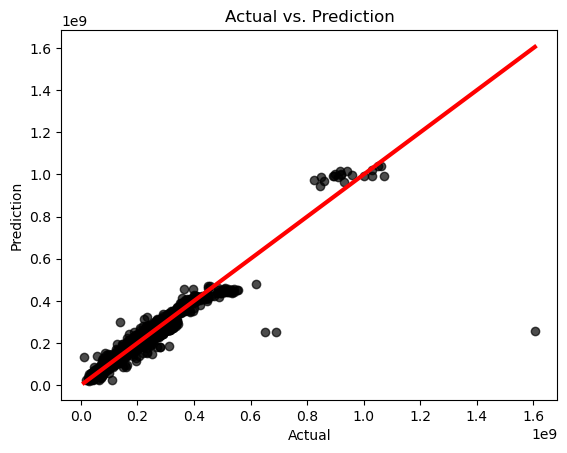

In [96]:
#Actual vs. Prediction
plt.scatter(x = test['price'], y = test['pred'], c = 'black', alpha = 0.7)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(test['price'].min(), test['price'].max(), 100)
plt.plot(xp, xp, c = 'red', linewidth = 3)
plt.show()

In [97]:
#Absolute percentage error
test['abs_pct_err'] = round(abs(test['price'] - test['pred']) / test['price'] * 100, 2)

In [98]:
#Summary statistics for absolute percentage error
test['abs_pct_err'].describe()

count    2852.000000
mean        9.375936
std        22.836628
min         0.000000
25%         3.680000
50%         7.390000
75%        11.190000
max      1126.390000
Name: abs_pct_err, dtype: float64

In [99]:
#Check obervations with large absolute percentage error
pd.set_option('display.max_columns', 25)
test.sort_values(by = 'abs_pct_err', ascending = False).head(20)

,no,time,city,brand,production_year,color,km,body_condition,engine_condition,chassis_condition,insurance_time_to_expire,gearbox,fuel_type,price,model,shamsy_year,age,color_levels,b_cond,e_cond,c_cond,if_automatic,pred,abs_pct_err
8234,8235,2022-03-27,Shiraz,PEUGEOT 405 GL CNG,1390,نقره ای,1111,تمام رنگ,سالم,سالم و پلمپ,11,دنده ای,CNG,11111111,405,1390,11,silver,22,A,A,no,1.362653e+08,1126.39
5666,5667,2022-03-26,Mashhad,PEUGEOT 405 GL CNG,1388,زرد,0,خط و خش جزیی,سالم,سالم و پلمپ,10,دنده ای,CNG,58000000,405,1388,13,other,2,A,A,no,1.368293e+08,135.91
1555,1556,2022-03-05,Tehran,PEUGEOT PARS SAL,1400,سفید,0,سالم و بی خط و خش,سالم,سالم و پلمپ,12,دنده ای,gasoline,138000000,PARS,1400,1,white,1,A,A,no,3.016851e+08,118.61
7348,7349,2022-03-12,Isfahan,PEUGEOT RD GAS,1385,یشمی,300000,تمام رنگ,سالم,سالم و پلمپ,12,اتوماتیک,gasoline,45000000,RD,1385,16,other,22,A,A,yes,8.658825e+07,92.42
4800,4801,2022-03-26,Tehran,PEUGEOT 508 GT,2017,سفید صدفی,4000,سالم و بی خط و خش,سالم,سالم و پلمپ,11,اتوماتیک,gasoline,1605000000,other,1396,5,other,1,A,A,yes,2.562358e+08,84.04
8116,8117,2022-03-12,Isfahan,PEUGEOT 405 SLX HYBRID,1390,زرد,150000,سالم و بی خط و خش,سالم,سالم و پلمپ,12,دنده ای,hybrid,85000000,405,1390,11,other,1,A,A,no,1.535551e+08,80.65
1298,1299,2022-03-26,Tehran,PEUGEOT 405 GL GAS,1372,قرمز,300000,تمام رنگ,سالم,سالم و پلمپ,12,دنده ای,gasoline,110000000,405,1372,29,other,22,A,A,no,2.666335e+07,75.76
8735,8736,2022-03-26,Shiraz,PEUGEOT RD LPG,1382,طوسی,111111,خط و خش جزیی,سالم,سالم و پلمپ,11,دنده ای,LPG,30000000,RD,1382,19,other,2,A,A,no,5.242949e+07,74.76
6774,6775,2022-03-12,Isfahan,PEUGEOT RD LPG,1384,یشمی,220000,خط و خش جزیی,سالم,سالم و پلمپ,7,دنده ای,LPG,35000000,RD,1384,17,other,2,A,A,no,5.941151e+07,69.75
7617,7618,2022-03-19,Isfahan,PEUGEOT 405 GL CNG,1390,زرد,350000,رنگ شدگی در ۱ ناحیه,سالم,سالم و پلمپ,12,دنده ای,CNG,77000000,405,1390,11,other,11,A,A,no,1.306176e+08,69.63


In [100]:
#Marketing Requirement
sum(test['abs_pct_err'] <= 15) / test.shape[0] * 100

87.02664796633941